In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from prob_iterator import prob_iterator

#intialize line_names
line_names = ['Red', 'Blue', 'Green', 'Brown', 'Purple', 'Purple Express', 'Yellow', 'Pink', 'Orange' ]

## Import and Style Data

In [2]:
#import L_data
L_data = pd.read_csv('../merging/L_data_merged.csv', low_memory = False)

In [3]:
#style L data
L_data = L_data.drop(['daytype','Location', 'Neighborhood', 'City'], axis = 1)

L_data['date'] = pd.to_datetime(L_data['date'], infer_datetime_format=True)

L_data = L_data.rename(columns = {'RED': 'Red', 'BLUE':'Blue', 'G':'Green', 'BRN':'Brown',  'P':'Purple', 'Pexp':'Purple Express', 'Y': 'Yellow', 'Pnk':'Pink', 'O':'Orange'})

L_data['number of lines'] = L_data[line_names].astype(int).sum(axis = 1)

#intiate 
for line in line_names:
    label_1 = line+'_frac'
    L_data[label_1]= (1 / L_data['number of lines']) * L_data[line].astype(int) * L_data['rides']
    
L_data = L_data.drop('number of lines', axis =1)

In [4]:
L_data

,date,rides,Station Name,Red,Blue,Green,Brown,Purple,Purple Express,Yellow,...,Orange,Red_frac,Blue_frac,Green_frac,Brown_frac,Purple_frac,Purple Express_frac,Yellow_frac,Pink_frac,Orange_frac
0,2004-10-09,1057,Harold Washington Library-State/Van Buren (Bro...,False,False,False,True,False,True,False,...,True,0.0,0.0,0.0,264.25,0.0,264.25,0.0,264.25,264.25
1,2010-06-18,1154,Central Park (Pink Line),False,False,False,False,False,False,False,...,False,0.0,0.0,0.0,0.00,0.0,0.00,0.0,1154.00,0.00
2,2001-10-30,2116,Montrose (Brown Line),False,False,False,True,False,False,False,...,False,0.0,0.0,0.0,2116.00,0.0,0.00,0.0,0.00,0.00
3,2006-10-26,0,Washington/State (Closed),True,False,False,False,False,False,False,...,False,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00
4,2010-07-07,9431,Monroe (Red Line),True,False,False,False,False,False,False,...,False,9431.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006156,2020-04-26,419,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,...,True,0.0,0.0,83.8,83.80,0.0,83.80,0.0,83.80,83.80
1006157,2020-04-27,883,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,...,True,0.0,0.0,176.6,176.60,0.0,176.60,0.0,176.60,176.60
1006158,2020-04-28,880,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,...,True,0.0,0.0,176.0,176.00,0.0,176.00,0.0,176.00,176.00
1006159,2020-04-29,768,"Washington/Wabash (Brown, Green, Orange, Purpl...",False,False,True,True,False,True,False,...,True,0.0,0.0,153.6,153.60,0.0,153.60,0.0,153.60,153.60


## Perform Iteration to estimate usage by line

In [74]:
#do not run this cell
#perform the iterations
for n in range(0,10):
    L_data = prob_iterator(L_data)
    L_data.to_csv('Output/iteration_data/L_data_'+str(n)+'.csv', index = False)

## Import estimated line usage data

* Run from here to avoid running iteration

In [3]:
L_data = pd.read_csv('Output/iteration_data/L_data_9.csv')

L_data['date'] = pd.to_datetime(L_data['date'], infer_datetime_format=True)

## Make Plots

In [97]:
L_data_2020 = L_data.loc[L_data['date']>= '01-06-2020']

In [98]:
line_dfs = {}

for line in line_names:
    line_dfs[line] = L_data_2020.loc[L_data_2020[line]].groupby(pd.Grouper(key='date', freq='W')).agg({
    line + '_frac': 'sum'
}).reset_index().rename(columns={line +'_frac' : line +'_rides'})

In [99]:
lines_df = pd.DataFrame(line_dfs['Red']['date'])

for line in line_names:
    lines_df = lines_df.merge(line_dfs[line], on = 'date')
    
lines_df = lines_df.set_index('date')

In [100]:
lines_df['sum'] = lines_df.sum(axis=1)

for line in line_names:
    lines_df[line + '_percent'] = lines_df[line +'_rides'] / lines_df['sum']

In [126]:
#set colors for each line
colors = {'Red', 'Blue', 'Green', 'Brown', 'Purple', 'Purple Express', 'Yellow', 'Pink', 'Orange'}

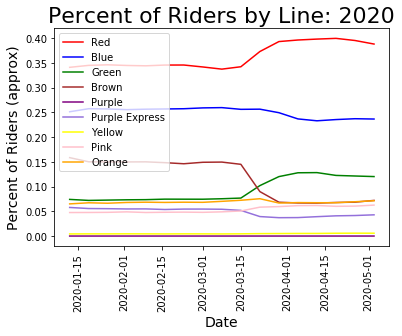

In [127]:
fig , ax = plt.subplots(1)
for line in line_names:    
    ax.plot(lines_df[line + '_percent'], color = colors[line], label = line)
    
plt.xticks(rotation = 90)
plt.xlabel('Date', size=14)
plt.ylabel('Percent of Riders (approx)', size =14)
plt.title('Percent of Riders by Line: 2020', size= 22)
plt.legend(loc = 'upper left')

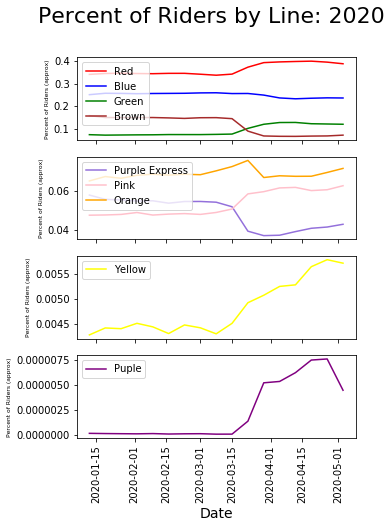

In [128]:
fig , ax = plt.subplots(4, sharex = True, figsize = (5, 7))
for line in ['Red', 'Blue', 'Green', 'Brown']:    
    ax[0].plot(lines_df[line + '_percent'], color = colors[line], label = line)

for line in ['Purple Express', 'Pink', 'Orange' ]:    
    ax[1].plot(lines_df[line + '_percent'], color = colors[line], label = line)
    
ax[2].plot(lines_df['Yellow_percent'], color = colors['Yellow'], label = 'Yellow')
ax[3].plot(lines_df['Purple_percent'], color = colors['Purple'], label = 'Puple')

for i in range(0,4):
    ax[i].set_ylabel('Percent of Riders (approx)', size =6)
    
plt.xticks(rotation = 90)
plt.xlabel('Date', size=14)
plt.suptitle('Percent of Riders by Line: 2020', size= 22)
for i in range(0,4):
    ax[i].legend(loc = 'upper left')

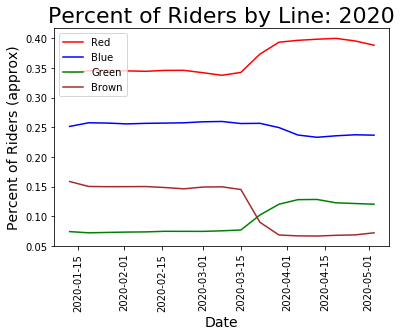

In [129]:
fig , ax = plt.subplots(1)
for line in ['Red', 'Blue', 'Green', 'Brown']:    
    ax.plot(lines_df[line + '_percent'], color = colors[line], label = line)
    
plt.xticks(rotation = 90)
plt.xlabel('Date', size=14)
plt.ylabel('Percent of Riders (approx)', size =14)
plt.title('Percent of Riders by Line: 2020', size= 22)
plt.legend(loc = 'upper left')

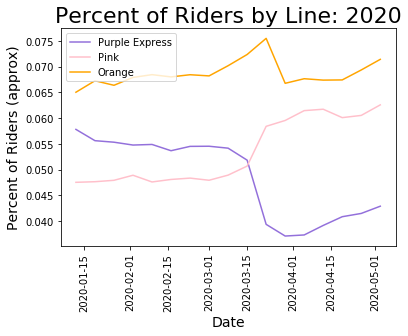

In [130]:
fig , ax = plt.subplots(1)
for line in ['Purple Express', 'Pink', 'Orange' ]:    
    ax.plot(lines_df[line + '_percent'], color = colors[line], label = line)
    
plt.xticks(rotation = 90)
plt.xlabel('Date', size=14)
plt.ylabel('Percent of Riders (approx)', size =14)
plt.title('Percent of Riders by Line: 2020', size= 22)
plt.legend(loc = 'upper left')

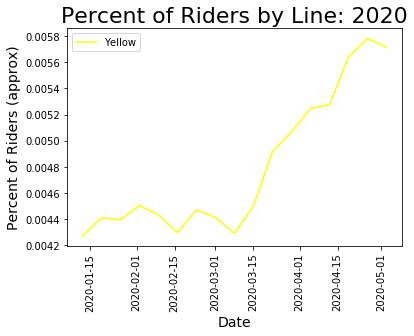

In [131]:
fig , ax = plt.subplots(1)

ax.plot(lines_df['Yellow_percent'], color = colors['Yellow'], label ='Yellow')
    
plt.xticks(rotation = 90)
plt.xlabel('Date', size=14)
plt.ylabel('Percent of Riders (approx)', size =14)
plt.title('Percent of Riders by Line: 2020', size= 22)
plt.legend(loc = 'upper left')

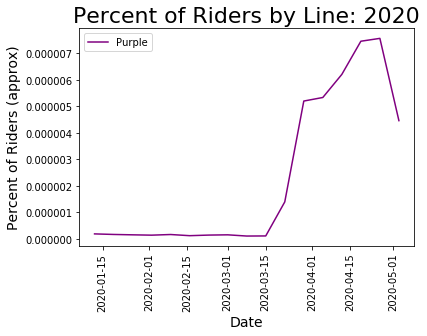

In [132]:
fig , ax = plt.subplots(1)

ax.plot(lines_df['Purple_percent'], color = colors['Purple'], label = 'Purple')
    
plt.xticks(rotation = 90)
plt.xlabel('Date', size=14)
plt.ylabel('Percent of Riders (approx)', size =14)
plt.title('Percent of Riders by Line: 2020', size= 22)
plt.legend(loc = 'upper left')